<a href="https://colab.research.google.com/github/khancynthia28/DL-Spring2019-CNN/blob/master/Simple_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple CNN Architecture demo
Testing Keras' CNNs on CIFAR10 with a pretty typical layer disposition.

## Data Setup

In [0]:
from keras.datasets import cifar10

Using TensorFlow backend.


In [0]:
(x_train, y_train_), (x_test, y_test_) = cifar10.load_data()

170500096/170498071 [==============================] - 106s 1us/step


In [0]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [0]:
from keras.utils import to_categorical
y_train = to_categorical(y_train_)
y_test = to_categorical(y_test_)

## Model Definition

In [0]:
from keras.models import Sequential
model = Sequential()

In [0]:
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [0]:
model.add(Conv2D(filters=32, 
                kernel_size=(3, 3),
                activation='relu',
                input_shape=(32, 32, 3)))

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model.add(MaxPool2D())

In [0]:
model.add(Conv2D(filters=64,
                kernel_size=(3, 3),
                activation='relu'))
model.add(MaxPool2D())

In [0]:
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [0]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [0]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                23050     
Total params: 42,442
Trainable params: 42,442
Non-trainable params: 0
_________________________________________________________________
None


## Fitting

In [0]:
history = model.fit(x_train, y_train, batch_size=50, epochs=50, verbose=1, validation_data=(x_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 10s 204us/step - loss: 1.5205 - acc: 0.4585 - val_loss: 1.2737 - val_acc: 0.5520
Epoch 2/50
50000/50000 [==============================] - 5s 105us/step - loss: 1.1859 - acc: 0.5864 - val_loss: 1.1072 - val_acc: 0.6191
Epoch 3/50
50000/50000 [==============================] - 5s 104us/step - loss: 1.0471 - acc: 0.6368 - val_loss: 1.0228 - val_acc: 0.6462
Epoch 4/50
50000/50000 [==============================] - 6s 111us/step - loss: 0.9641 - acc: 0.6694 - val_loss: 0.9876 - val_acc: 0.6618
Epoch 5/50
50000/50000 [==============================] - 6s 115us/step - loss: 0.9094 - acc: 0.6884 - val_loss: 0.9965 - val_acc: 0.6571
Epoch 6/50
50000/50000 [==============================] - 5s 105us/step - loss: 0.8621 - acc: 0.7047 - val_loss: 0.9512 - val_acc: 0.6745
Epoch 7/50
50000/50000 [==============================] - 5s 103us/step -

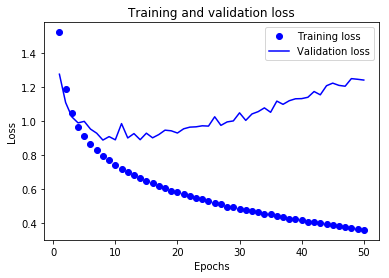

In [0]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['acc']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()